In [1]:
from __future__ import division
import os
import sys
import copy
import numpy as np
from numpy import ma
import math as m
import pandas as pd
import matplotlib.patches as mpatches
import string

import pickle
from numpy import genfromtxt
from scipy.interpolate import griddata
from matplotlib import rc
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D

import datetime
from matplotlib.dates import DayLocator, MonthLocator, HourLocator, AutoDateLocator, DateFormatter, drange
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU, WeekdayLocator
from numpy import arange
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.mlab as mlab

import glob

In [2]:
# Font / Figure Size
import matplotlib.pylab as pylab
params = {'legend.fontsize': '10',
         'axes.labelsize': '10',
         'axes.titlesize': '10',
         'xtick.labelsize': '10',
         'ytick.labelsize': '10',

         'xtick.major.pad': '7',
         'ytick.major.pad': '7',
         'axes.titlepad': 35,
         'axes.labelpad': 15,

         #'font.sans-serif':'Avenir'
          }
pylab.rcParams.update(params)

In [3]:
# Custom Colors

darkblue = '#4e79a7'
orange = '#f28e2b'
red = '#e15759'
lightblue = '#76b7b2'
green = '#59a14f'
yellow = '#edc948'
purple = '#b07aa1'
pink = '#ff9da7'
brown = '#9c755f'
gray = '#bab0ac'

In [4]:
file_name = '../Summary_of_Storage_Tech_Costs.xlsx'
sheet1 = 'Total Overnight Costs' # 'tic'
sheet2 = 'RTEs' # 'rte'

toc = pd.read_excel(io=file_name, sheet_name=sheet1, skiprows=1, header=0)
rte = pd.read_excel(io=file_name, sheet_name=sheet2, skiprows=1, header=0)

In [5]:
from extract_data_sep_power import get_data_sep_power
from extract_data_one_power import get_data_one_power

In [6]:
def pie_chart(ax, index, tech_name, energy_midpoint, power_midpoint, RTE):
    theta = (RTE * 360 - 90)
    radius = 0.045
    ax.add_patch(mpatches.Circle((energy_midpoint, power_midpoint), radius, edgecolor=gray,
                                 facecolor='white', fill=True, lw=1, transform=ax.transAxes, clip_on=False,
                                zorder=100))
    ax.add_patch(mpatches.Wedge((energy_midpoint, power_midpoint), radius, -theta, 90,
                                facecolor=storage_colors[index], fill=True, linewidth=None,
                               transform=ax.transAxes, clip_on=False, zorder=100))

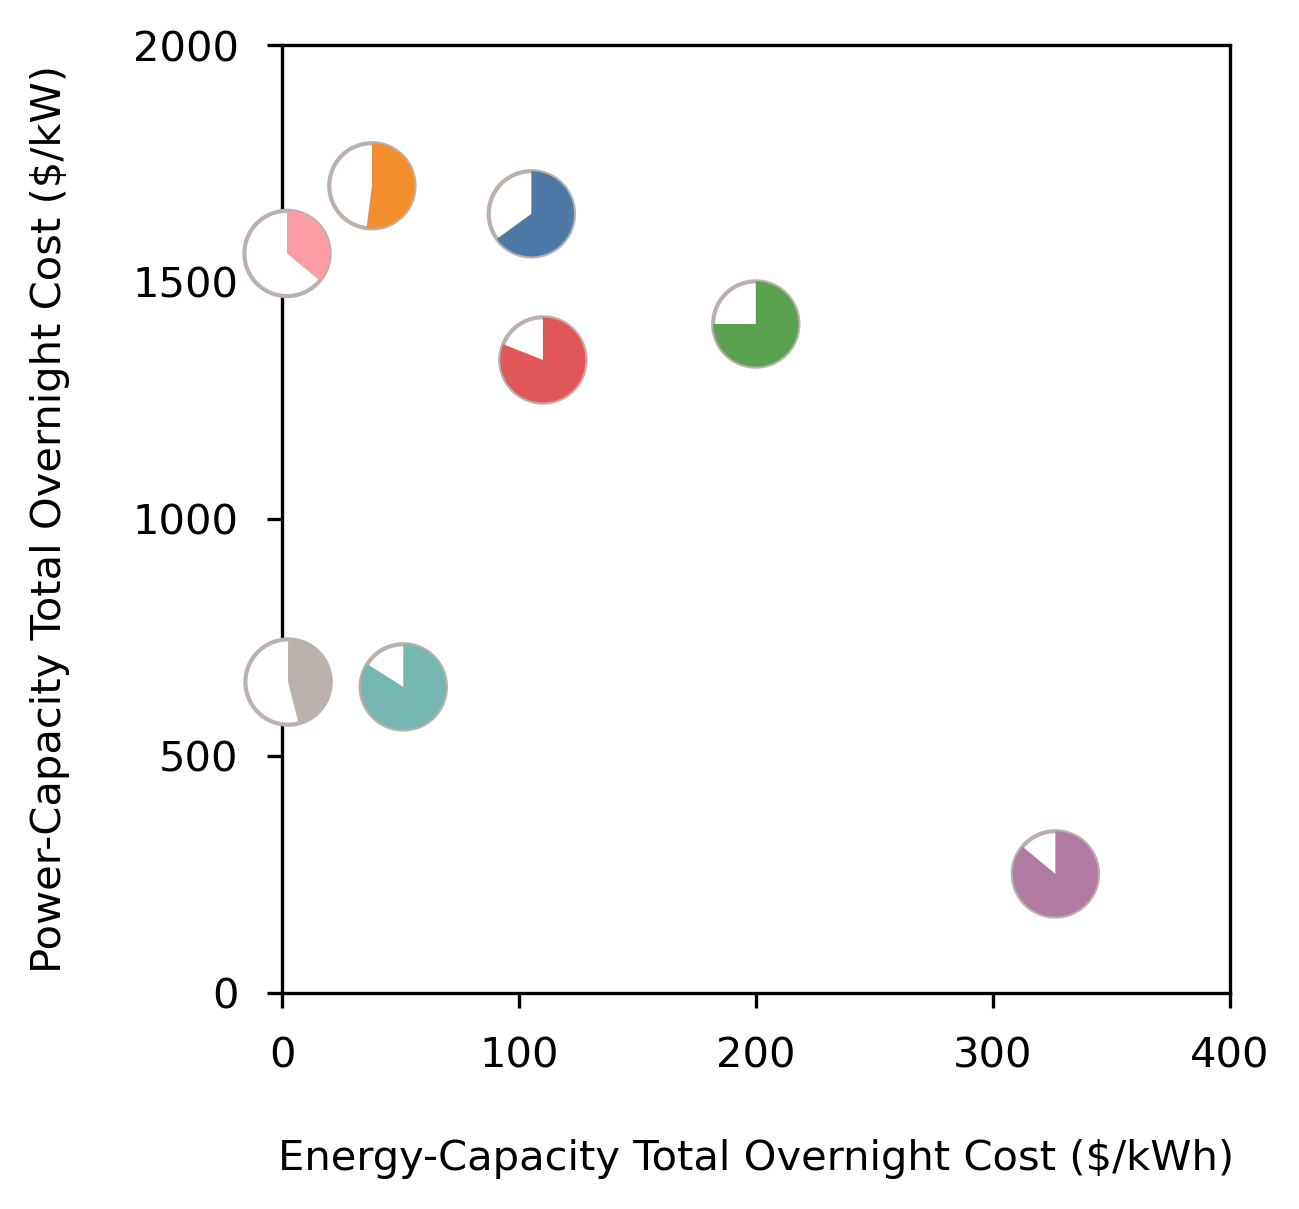

In [7]:
# Set up techs

without_x = 'Li-ion_PGP'

storage_names = ['Li-ion', 'RFB', 'PSH', 'Gravitational', 'Thermal', 'CAES', 'Metal-Air', 'PGP']
storage_colors= [purple, green, darkblue, red, orange, lightblue, gray, pink]

storage_x_names = [without_x, 'RFB', 'PSH', 'Gravitational', 'Thermal', 'CAES', 'Metal-Air',]
storage_x_colors = ['white', green, darkblue, red, orange, lightblue, gray,]

# Plot Figure

mm = 1/25.4 # millimeters in inches
fig_w = 112*mm
fig_h = 112*mm
fig = plt.subplots(nrows=1,ncols=1, figsize=(fig_w,fig_h), dpi=300)

#####################################################################
#         Total Overnight Costs and Round Trip Efficiencies         #
#####################################################################

ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

#ax1.set_title('a) Total Overnight Costs\n           of Storage Technologies')
ax1.set_xlabel('Energy-Capacity Total Overnight Cost ($/kWh)')
ax1.set_ylabel('Power-Capacity Total Overnight Cost ($/kW)')

min_energy_toc = 0
max_energy_toc = 400

min_power_toc = 0
max_power_toc = 2000

ax1.set_xlim(min_energy_toc, max_energy_toc)
ax1.set_ylim(min_power_toc, max_power_toc)

ax1.set_xticks([0, 100, 200, 300, 400])
ax1.set_yticks([0, 500, 1000, 1500, 2000])

for i, tech_name in enumerate(storage_names):
    tech_toc = toc.iloc[i]
    tech_rte = rte.iloc[i]
    energy_midpoint = tech_toc['Energy Base Case'] - min_energy_toc
    power_midpoint = tech_toc['Power Base Case']

    pie_chart(ax1, i, tech_name, energy_midpoint/(max_energy_toc-min_energy_toc), power_midpoint/max_power_toc, tech_rte['RTE Midpoint'])

#####################################################################

ax1.set_box_aspect(1)

plt.tight_layout()
plt.subplots_adjust(wspace=0.75, hspace=0.25)

if not os.path.exists('Figures'):
    os.makedirs('Figures')
plt.savefig('Figures/Fig_3_energy_power_costs_efficiencies.png', dpi=300, bbox_inches='tight')

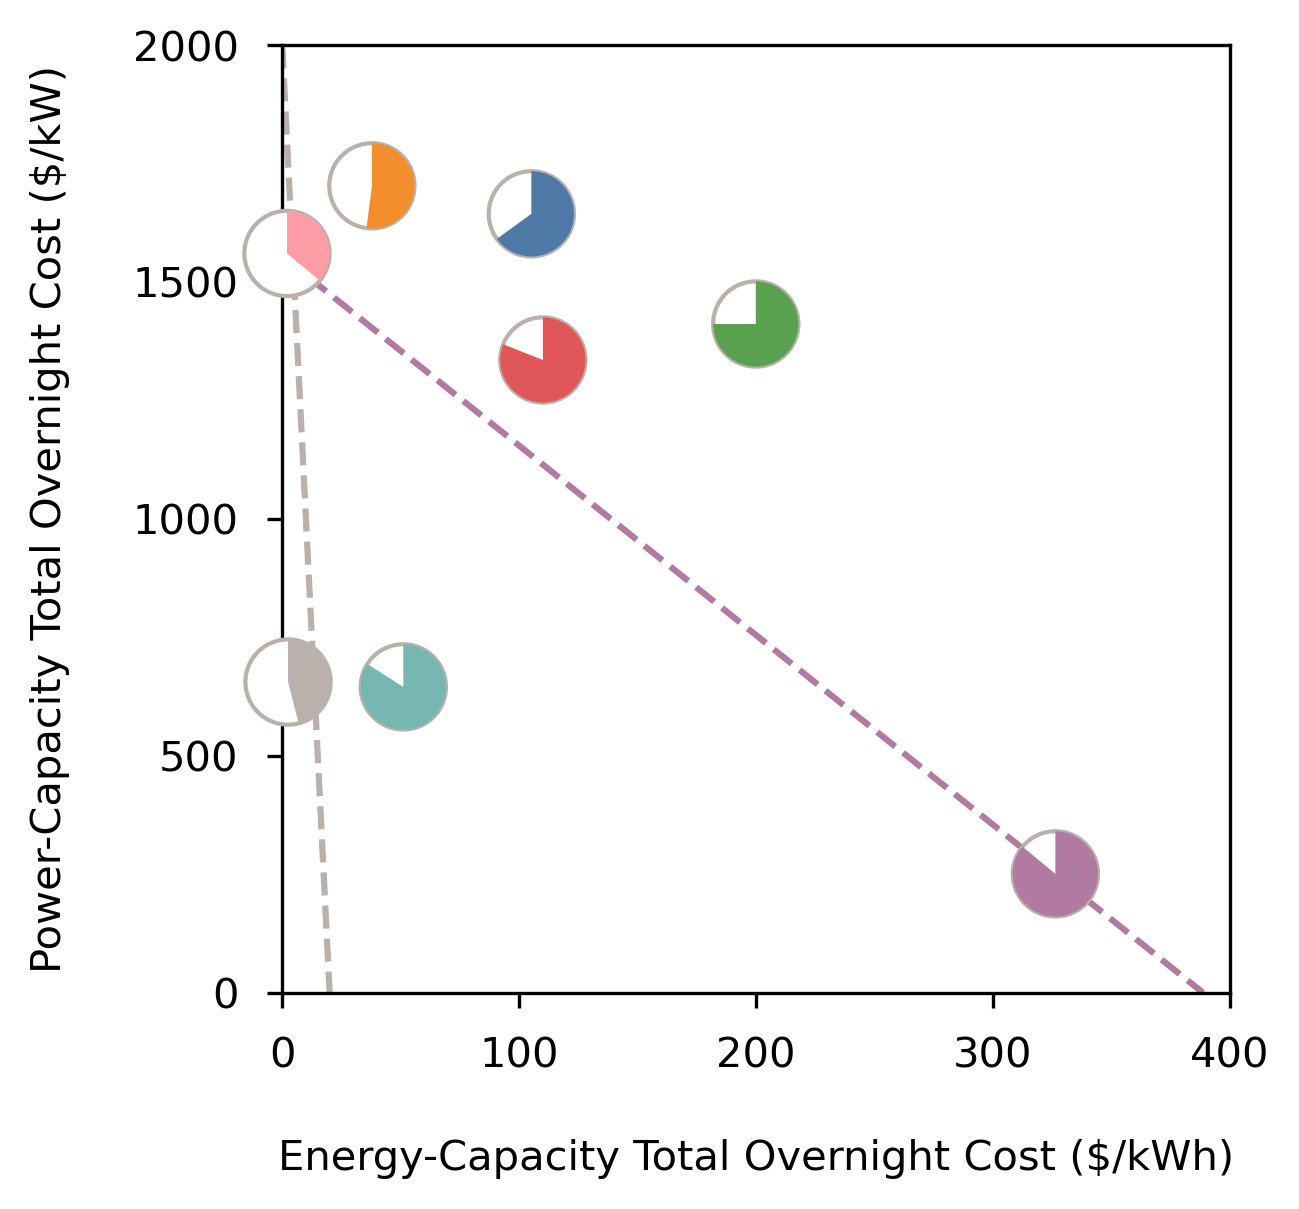

In [8]:
#####################################################################
#         Total Overnight Costs and Round Trip Efficiencies         #
#####################################################################

# For SI to describe costs of Li-ion batteries better

mm = 1/25.4 # millimeters in inches
fig_w = 112*mm
fig_h = 112*mm
fig = plt.subplots(nrows=1,ncols=1, figsize=(fig_w,fig_h), dpi=300)

#####################################################################
#         Total Overnight Costs and Round Trip Efficiencies         #
#####################################################################

ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

#ax1.set_title('a) Total Overnight Costs\n           of Storage Technologies')
ax1.set_xlabel('Energy-Capacity Total Overnight Cost ($/kWh)')
ax1.set_ylabel('Power-Capacity Total Overnight Cost ($/kW)')

min_energy_toc = 0
max_energy_toc = 400

min_power_toc = 0
max_power_toc = 2000

ax1.set_xlim(min_energy_toc, max_energy_toc)
ax1.set_ylim(min_power_toc, max_power_toc)

ax1.set_xticks([0, 100, 200, 300, 400])
ax1.set_yticks([0, 500, 1000, 1500, 2000])

for i, tech_name in enumerate(storage_names):
    tech_toc = toc.iloc[i]
    tech_rte = rte.iloc[i]
    energy_midpoint = tech_toc['Energy Base Case'] - min_energy_toc
    power_midpoint = tech_toc['Power Base Case']

    pie_chart(ax1, i, tech_name, energy_midpoint/(max_energy_toc-min_energy_toc), power_midpoint/max_power_toc, tech_rte['RTE Midpoint'])

#####################################################################

ax1.set_box_aspect(1)

plt.axline((0, 1555), (388.75, 0), color=purple, linestyle='--') # True energy/power-capacity costs for Li-ion batteries (388.75 $/kWh * 4 h = 1555)
plt.axline((0, 2000), (20, 0), color=gray, linestyle='--') # True energy/power-capacity costs for metal-air batteries (20 $/kWh * 100 h = 2000)

plt.tight_layout()
plt.subplots_adjust(wspace=0.75, hspace=0.25)

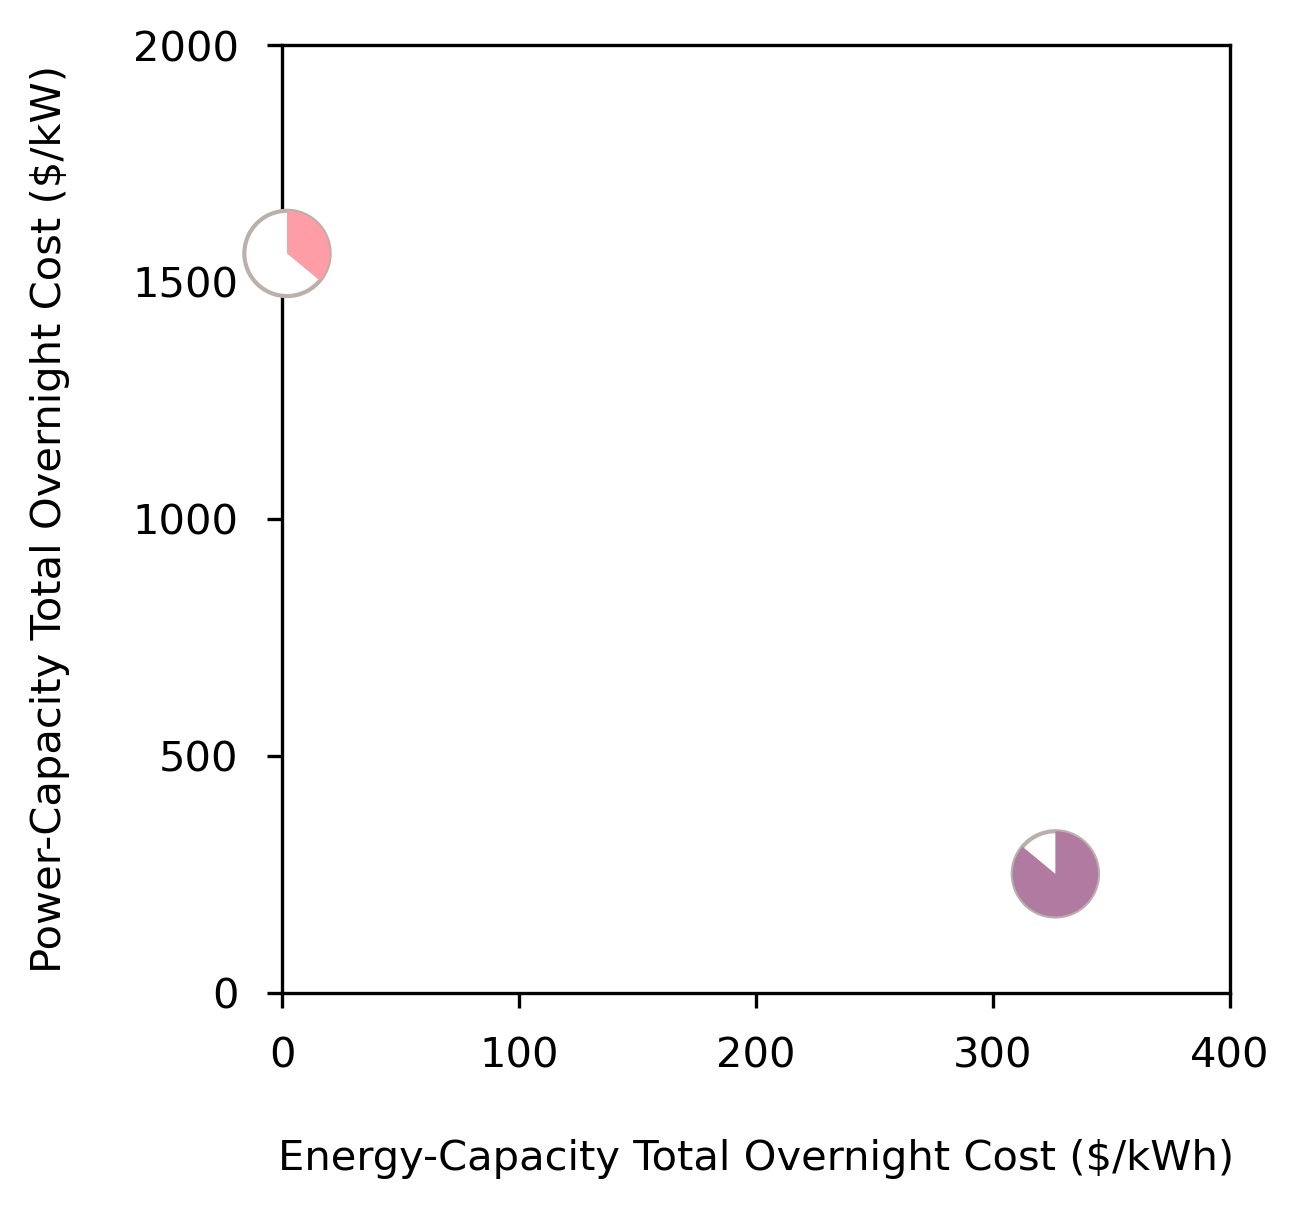

In [9]:
# Set up techs

without_x = 'Li-ion_PGP'

storage_names = ['Li-ion', 'RFB', 'PSH', 'Gravitational', 'Thermal', 'CAES', 'Metal-Air', 'PGP']
storage_colors= [purple, green, darkblue, red, orange, lightblue, gray, pink]

storage_x_names = [without_x, 'RFB', 'PSH', 'Gravitational', 'Thermal', 'CAES', 'Metal-Air',]
storage_x_colors = ['white', green, darkblue, red, orange, lightblue, gray,]

# Plot Figure

mm = 1/25.4 # millimeters in inches
fig_w = 112*mm
fig_h = 112*mm
fig = plt.subplots(nrows=1,ncols=2, figsize=(fig_w,fig_h), dpi=300)

#####################################################################
#         Total Overnight Costs and Round Trip Efficiencies         #
#####################################################################

ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

#ax1.set_title('a) Total Overnight Costs\n           of Storage Technologies')
ax1.set_xlabel('Energy-Capacity Total Overnight Cost ($/kWh)')
ax1.set_ylabel('Power-Capacity Total Overnight Cost ($/kW)')

min_energy_toc = 0
max_energy_toc = 400

min_power_toc = 0
max_power_toc = 2000

ax1.set_xlim(min_energy_toc, max_energy_toc)
ax1.set_ylim(min_power_toc, max_power_toc)

ax1.set_xticks([0, 100, 200, 300, 400])
ax1.set_yticks([0, 500, 1000, 1500, 2000])

for i, tech_name in enumerate(storage_names):
  if tech_name == 'Li-ion' or tech_name == 'PGP':
    tech_toc = toc.iloc[i]
    tech_rte = rte.iloc[i]
    energy_midpoint = tech_toc['Energy Base Case'] - min_energy_toc
    power_midpoint = tech_toc['Power Base Case']

    pie_chart(ax1, i, tech_name, energy_midpoint/(max_energy_toc-min_energy_toc), power_midpoint/max_power_toc, tech_rte['RTE Midpoint'])

#####################################################################

ax1.set_box_aspect(1)

plt.tight_layout()
plt.subplots_adjust(wspace=0.75, hspace=0.25)